In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# turn off top and rigt axis line in matplotlib
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# change font size in matplolib
plt.rcParams.update({'font.size': 14})

# increasing the deafult DPI to improve resolution
#plt.rcParams['figure.dpi']= 50 # for preview
plt.rc("savefig", dpi = 300) # for saving

In [66]:
# Import Kateri's processed water quality data
df = pd.read_csv("../data/ul_data_wqp_processed_2020-03-05.csv")

In [67]:
df.head(50)

,MonitoringLocationIdentifier,SampleDepthValue,RelativeDepth,datetime,CharacteristicName,ResultSampleFractionText,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationName,MonitoringLocationTypeName,...,LowerQuantitationLimit,LowerReportingLimit,MethodDetectionLevel,UpperQuantitationLimit,EstimatedQuantitationLimitUnit,LowerQuantitationLimitUnit,LowerReportingLimitUnit,MethodDetectionLevelUnit,UpperQuantitationLimitUnit,result_count
0,NALMS-7458,NaN,NaN,2012-06-27 02:30:00,"Depth, Secchi disk depth",NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NALMS-7458,NaN,NaN,2012-06-27 02:30:00,Weather condition (WMO code 4501) (choice list),NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NALMS-7458,NaN,NaN,2015-07-03 01:30:00,"Depth, Secchi disk depth",NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NALMS-7458,NaN,NaN,2015-07-03 01:30:00,Dissolved oxygen (DO),NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NALMS-7458,NaN,NaN,2015-07-03 01:30:00,pH,NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,NALMS-7458,NaN,NaN,2015-07-03 01:30:00,"Temperature, water",NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,NALMS-7458,NaN,NaN,2015-07-03 01:30:00,Weather condition (WMO code 4501) (choice list),NaN,NALMS,North American Lake Management Society,Utah Lake,Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,USGS-401327111462601,NaN,NaN,2016-08-10 13:05:00,"Alkalinity, total",Dissolved,USGS-UT,USGS Utah Water Science Center,UTAH LAKE HAB STUDY SITE 3,"Lake, Reservoir, Impoundment",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,USGS-401327111462601,NaN,NaN,2016-08-10 13:05:00,Bromide,Dissolved,USGS-UT,USGS Utah Water Science Center,UTAH LAKE HAB STUDY SITE 3,"Lake, Reservoir, Impoundment",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,USGS-401327111462601,NaN,NaN,2016-08-10 13:05:00,Calcium,Dissolved,USGS-UT,USGS Utah Water Science Center,UTAH LAKE HAB STUDY SITE 3,"Lake, Reservoir, Impoundment",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [68]:
df.columns

Index(['MonitoringLocationIdentifier', 'SampleDepthValue', 'RelativeDepth',
       'datetime', 'CharacteristicName', 'ResultSampleFractionText',
       'OrganizationIdentifier', 'OrganizationFormalName',
       'MonitoringLocationName', 'MonitoringLocationTypeName',
       'LatitudeMeasure', 'LongitudeMeasure',
       'HorizontalCoordinateReferenceSystemDatumName', 'SampleDepthUnit',
       'minute', 'hour', 'ResultMeasureValue', 'ResultMeasure.MeasureUnitCode',
       'MethodSpecificationName', 'MeasureQualifierCode',
       'ResultDetectionConditionText', 'ResultStatusIdentifier',
       'ResultValueTypeName', 'ActivityMediaName',
       'EstimatedQuantitationLimit', 'LowerQuantitationLimit',
       'LowerReportingLimit', 'MethodDetectionLevel', 'UpperQuantitationLimit',
       'EstimatedQuantitationLimitUnit', 'LowerQuantitationLimitUnit',
       'LowerReportingLimitUnit', 'MethodDetectionLevelUnit',
       'UpperQuantitationLimitUnit', 'result_count'],
      dtype='object')

In [69]:
# Selecting relevant columns
df_selected = df.loc[:,["MonitoringLocationIdentifier","datetime",
                        "CharacteristicName", "MonitoringLocationName",
                        "LatitudeMeasure", "LongitudeMeasure", 
                        "ResultMeasureValue", "ResultMeasure.MeasureUnitCode"]].copy()

In [70]:
df_selected.head()

,MonitoringLocationIdentifier,datetime,CharacteristicName,MonitoringLocationName,LatitudeMeasure,LongitudeMeasure,ResultMeasureValue,ResultMeasure.MeasureUnitCode
0,NALMS-7458,2012-06-27 02:30:00,"Depth, Secchi disk depth",Utah Lake,40.209983,-111.824151,2.50,cm
1,NALMS-7458,2012-06-27 02:30:00,Weather condition (WMO code 4501) (choice list),Utah Lake,40.209983,-111.824151,0.00,NaN
2,NALMS-7458,2015-07-03 01:30:00,"Depth, Secchi disk depth",Utah Lake,40.209983,-111.824151,0.27,m
3,NALMS-7458,2015-07-03 01:30:00,Dissolved oxygen (DO),Utah Lake,40.209983,-111.824151,10.00,ppm
4,NALMS-7458,2015-07-03 01:30:00,pH,Utah Lake,40.209983,-111.824151,8.00,None


In [71]:
# rename columns
df_selected = df_selected.rename(columns={'MonitoringLocationIdentifier':'id',
                                          'CharacteristicName':'parameter',
                                          'MonitoringLocationName':'location',
                                          'LatitudeMeasure':'lat',
                                          'LongitudeMeasure':'long',
                                          'ResultMeasureValue':'value',
                                          'ResultMeasure.MeasureUnitCode':'unit'
                                         }, inplace=False)

In [72]:
df_selected.head()

,id,datetime,parameter,location,lat,long,value,unit
0,NALMS-7458,2012-06-27 02:30:00,"Depth, Secchi disk depth",Utah Lake,40.209983,-111.824151,2.50,cm
1,NALMS-7458,2012-06-27 02:30:00,Weather condition (WMO code 4501) (choice list),Utah Lake,40.209983,-111.824151,0.00,NaN
2,NALMS-7458,2015-07-03 01:30:00,"Depth, Secchi disk depth",Utah Lake,40.209983,-111.824151,0.27,m
3,NALMS-7458,2015-07-03 01:30:00,Dissolved oxygen (DO),Utah Lake,40.209983,-111.824151,10.00,ppm
4,NALMS-7458,2015-07-03 01:30:00,pH,Utah Lake,40.209983,-111.824151,8.00,None


In [73]:
df_selected.dtypes

id            object
datetime      object
parameter     object
location      object
lat          float64
long         float64
value        float64
unit          object
dtype: object

In [74]:
# make datetime column datetime type
df_selected.datetime = pd.to_datetime(df_selected['datetime'])

In [75]:
# number of stations
df_selected.id.nunique()

67

In [11]:
# see unique water quality parameters
display(df_selected.parameter.nunique())
display(df_selected.parameter.unique())
display(df_selected.parameter.unique().sort())

108

array(['Depth, Secchi disk depth',
       'Weather condition (WMO code 4501) (choice list)',
       'Dissolved oxygen (DO)', 'pH', 'Temperature, water',
       'Alkalinity, total', 'Bromide', 'Calcium', 'Chloride', 'Fluoride',
       'Hardness, Ca, Mg', 'Hardness, non-carbonate',
       'Inorganic nitrogen (nitrate and nitrite)', 'Magnesium',
       'Orthophosphate', 'Potassium', 'Silica',
       'Sodium adsorption ratio [(Na)/(sq root of 1/2 Ca + Mg)]',
       'Sodium', 'Sodium, percent total cations', 'Sulfate',
       'Total dissolved solids', 'Turbidity', 'Bicarbonate',
       'Calcium carbonate', 'Carbon dioxide', 'Carbonate',
       'Chemical oxygen demand',
       'Chlorophyll a, uncorrected for pheophytin', 'Hydroxide',
       'Kjeldahl nitrogen', 'Nitrate', 'Nitrite', 'Phosphate-phosphorus',
       'Specific conductance', 'Total suspended solids',
       '.alpha.-Endosulfan', '.alpha.-Hexachlorocyclohexane',
       '.beta.-Endosulfan', '.beta.-Hexachlorocyclohexane',
       '.

None

In [26]:
# Dataframe containing only dissolved oxygen data
do = df_selected.loc[df_selected.parameter == 'Chlorophyll a, corrected for pheophytin', :]

In [27]:
do.head(50)

,id,datetime,parameter,location,lat,long,value,unit
5505,UTAHDWQ_WQX-4917310,2010-06-14 13:31:25,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,2.200,ug/l
5519,UTAHDWQ_WQX-4917310,2010-07-15 12:31:47,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,10.000,ug/l
5533,UTAHDWQ_WQX-4917310,2010-08-23 10:53:03,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,19.100,ug/l
5552,UTAHDWQ_WQX-4917310,2011-08-22 13:09:41,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,140.800,ug/l
5580,UTAHDWQ_WQX-4917310,2011-09-22 11:49:33,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,14.500,ug/l
5609,UTAHDWQ_WQX-4917310,2011-10-12 13:49:04,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,61.800,ug/l
5632,UTAHDWQ_WQX-4917310,2012-05-31 12:32:29,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,NaN,ug/l
5641,UTAHDWQ_WQX-4917310,2012-07-02 14:05:00,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,NaN,ug/l
5650,UTAHDWQ_WQX-4917310,2012-08-15 08:50:00,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,46.200,ug/l
5659,UTAHDWQ_WQX-4917310,2012-09-06 13:15:00,"Chlorophyll a, corrected for pheophytin",UTAH LAKE 0.5 MI W OF GENEVA DISCHARGE #15-A,40.320873,-111.777538,44.700,ug/l


In [28]:
# Store stations in a dictionary
list_of_stations = list(do.id.unique())

In [64]:
do.id.nunique()

11

In [59]:
# Define function to plot time series of a selected station
def get_plot(station, begin_year, end_year):
    
    # Store station ID in a separate variable
    station_id = list_of_stations[station]
    
    # Select rows with selected station
    df = do.loc[do.id==station_id,:]
    
    # Select rows that are recorded in year within our specified range
    df = df[(df.datetime.dt.year >= begin_year) & (df.datetime.dt.year <= end_year)]
    
    #sort by datetime and reset index
    df = df.sort_values(by = 'datetime').reset_index()
    
    # Visualizing dissolved oxygen to detect algal bloom
    plt.figure(figsize=(15,6)) 
    plt.scatter(df.datetime, df.value, alpha=0.3, s=150)
    #plt.plot(df.datetime, df.value)
    plt.xlabel("Date")
    plt.ylabel("Chlorophyll (ug/l)")
    plt.title(f"Utah Lake Station {station_id}")
    #plt.savefig(f"Chlorophyll Station {station_id}.png", bbox_inches = "tight")
    #$\mathregular{l^{-1}}$
    plt.show()

Enter station number (0-25): Station #3


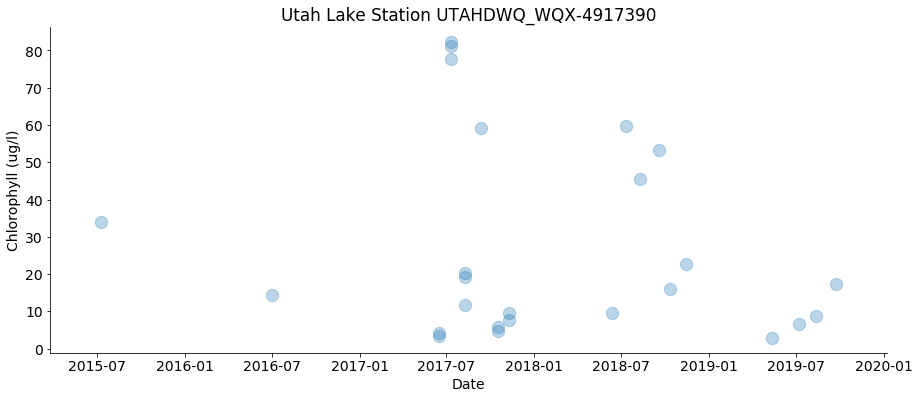

In [60]:
st = int(input("Enter station number (0-11): Station #"))
get_plot(st, 2015, 2019)
#2,6

Enter station number (0-25): Station #4


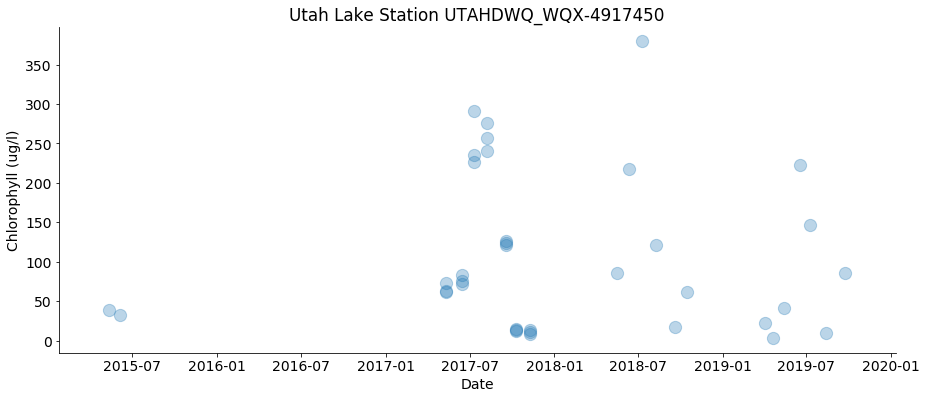

In [61]:
st = int(input("Enter station number (0-11): Station #"))
get_plot(st, 2015, 2019)
#4

In [ ]:
st = int(input("Enter station number (0-11): Station #"))
get_plot(st, 2015, 2019)
#2,6

In [ ]:
st = int(input("Enter station number (0-11): Station #"))
get_plot(st, 2015, 2019)
#2,6

In [17]:
# Selecting station "UTAHDWQ_WQX-4917390" because it has most number of records (650)
station_id = "UTAHDWQ_WQX-4917390"
df = do.loc[do.id==station_id,:]

In [18]:
# Select specific years of data
a = 2016
b = 2019
df = df[(df.datetime.dt.year >= a) & (df.datetime.dt.year <= b)]

In [19]:
df.datetime.dt.year

Series([], Name: datetime, dtype: int64)

In [20]:
df.head()

,id,datetime,parameter,location,lat,long,value,unit


In [21]:
# Checking NA values for DO values
df.value.isna().sum()

0

In [22]:
#sort by datetime and reset index
df = df.sort_values(by = 'datetime').reset_index()

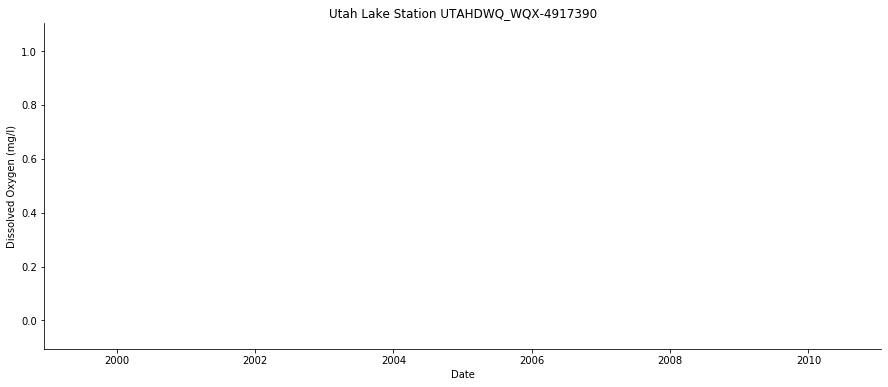

In [23]:
# Visualizing to detect algal bloom
plt.figure(figsize=(15,6)) 
plt.scatter(df.datetime, df.value, alpha=0.3)
plt.plot(df.datetime, df.value)
plt.xlabel("Date")
plt.ylabel("Dissolved Oxygen (mg/l)")
plt.title(f"Utah Lake Station {station_id}")
#$\mathregular{l^{-1}}$
plt.show()

In [24]:
df.datetime.dt.year

Series([], Name: datetime, dtype: int64)